In [376]:
#import statements 
import matplotlib.pyplot as plt
import numpy as np
import json
from datetime import datetime
#from os import listdir
#from os.path import isfile, join
import os
from PIL import Image
import requests
from heapq import nlargest
from operator import itemgetter

In [377]:
#Task 1.2: Dashboard of Data

In [378]:
#UserData.json
def userdata():
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/Userdata.json')
    json_data = f
    opened = json.loads(json_data.read())
    
    result = "general account information: \n"
    result += "\t" + "username: " + opened['username'] + "\n"
    #result += "email: " + opened['email'] + "\n"
    result += "\t" + "country of user: " + opened['country'] + "\n"
    #result += "facebookID of associated user: " + opened['facebookUid'] + "\n"
    val_input = opened['birthdate']
    val_format = '%Y-%m-%d'
    dt = datetime.strptime(val_input, val_format)
    dt = dt.strftime("%m/%d/%Y")
    result += "\t" + "birthday: " + dt + "\n"
    result += "\t" + "gender: " + opened['gender'] + "\n"
    val_input = opened['creationTime']
    val_format = '%Y-%m-%d'
    dt = datetime.strptime(val_input, val_format)
    dt = dt.strftime("%m/%d/%Y")
    result += "\t" + "date of account creation: " + dt + "\n"
    f.close()
    
    return result

print(userdata())

general account information: 
	username: x5rqcqscv9d34yeeftb8dawz2
	country of user: US
	birthday: 06/06/2000
	gender: female
	date of account creation: 04/09/2021



In [379]:
#Follow.json
def follow():
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/Follow.json')
    json_data = f
    opened = json.loads(json_data.read())
    
    result = "community engagement information: " + "\n"
    result += "\t" + "number of followers: " + str(opened['followerCount']) + "\n"
    result += "\t" + "number of followings: " + str(opened['followingUsersCount']) + "\n"
    f.close()
    
    return result
    
    
print(follow())

community engagement information: 
	number of followers: 23
	number of followings: 31



In [380]:
#getting the names of all the files in a directory: The files available in the downloaded data folder
def files():
    path = '/Users/christopherbarnes/cmsc25910/Assignment3/MyData/'
    files_dirs = os.listdir(path)
    result = 'data contained in the requested data download: \n'
    i = 1
    for files in files_dirs:
        result += "\t" + str(i) + ": " + files + "\n"
        i += 1
    return result
print(files())

data contained in the requested data download: 
	1: UserAddress.json
	2: Follow.json
	3: Inferences.json
	4: VoiceInput.json
	5: Userdata.json
	6: SearchQueries.json
	7: StreamingHistory0.json
	8: Identity.json
	9: YourLibrary.json
	10: Payments.json
	11: StreamingHistory1.json
	12: Read_Me_First.pdf
	13: Identifiers.json



In [381]:
#Identity.json
def identity():
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/Identity.json')
    json_data = f
    opened = json.loads(json_data.read())
    result = "user information: " + "\n"
    result += "\t" + "display name: " + opened['displayName'] + "\n"

    url = opened['imageUrl']
    im = Image.open(requests.get(url, stream=True).raw)
    result += "\t" + "profile picture: refer to photo output" + "\n"
    im.show()

    f.close()
    return result

print(identity())

user information: 
	display name: abby b!
	profile picture: refer to photo output



In [382]:
#YourLibrary.json
def library():
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/YourLibrary.json')
    json_data = f
    opened = json.loads(json_data.read())
    result = "general library information (downloaded to devices): " + "\n"
    result += "\t" + "number of songs: " + str(len(opened["tracks"])) + "\n"
    result += "\t" + "number of albums: " + str(len(opened["albums"])) + "\n"
    result += "\t" + "number of shows: " + str(len(opened["shows"])) + "\n"
    result += "\t" + "number of episodes: " + str(len(opened["episodes"])) + "\n"
    result += "\t" + "number of removed tracks: " + str(len(opened["bannedTracks"])) + "\n"
    result += "\t" + "number of artists: " + str(len(opened["artists"])) + "\n"
    result += "\t" + "number of removed artists: " + str(len(opened["bannedArtists"])) + "\n"

    #print(opened.keys())

    f.close()
    return result

print(library())

general library information (downloaded to devices): 
	number of songs: 585
	number of albums: 649
	number of shows: 10
	number of episodes: 12
	number of removed tracks: 0
	number of artists: 30
	number of removed artists: 0



In [383]:
#opening StreamingHistory0.json and StreamingHistory1.json
#sorting values into directories for data visualization
artists = dict()
songs = dict()
days = dict()
months = dict()

def streamingHistory():
    f0 = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/StreamingHistory0.json')
    json_data0 = f0
    opened0 = json.loads(json_data0.read())
    f1 = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/StreamingHistory1.json')
    json_data1 = f1
    opened1 = json.loads(json_data1.read())

        
    i = 0
    #open0
    while i < len(opened0):
        #looping through each user
        curr_artist = opened0[i]['artistName']
        curr_song  = opened0[i]['trackName']
        curr_day = opened0[i]['endTime'][0:10]
        curr_month = opened0[i]['endTime'][5:7]
        curr_ms = opened0[i]['msPlayed']
        
        #ARTIST
        if curr_artist in artists:
            temp_plays = artists[curr_artist]
            artists[curr_artist] = temp_plays + 1
        else:
            artists[curr_artist] = 1
            
        #SONGS
        if curr_song in songs:
            temp_plays = songs[curr_song]
            songs[curr_song] = temp_plays + 1
        else:
            songs[curr_song] = 1
            
        #MINS per DAY
        if curr_day in days:
            temp_ms = days[curr_day]
            days[curr_day] = temp_ms + round(curr_ms / 60000)
        else:
            days[curr_day] = round(curr_ms / 60000)
        
        #MINS per MONTH
        if curr_month in months:
            temp_ms = months[curr_month]
            months[curr_month] = temp_ms + round(curr_ms / 60000)
        else:
            months[curr_month] = round(curr_ms / 60000)

    
        i = i + 1     
    i = 0
    #open0
    while i < len(opened1):
        #looping through each user
        curr_artist = opened1[i]['artistName']
        curr_song  = opened1[i]['trackName']
        curr_day = opened1[i]['endTime'][0:10]
        curr_month = opened0[i]['endTime'][5:7]
        curr_ms = opened1[i]['msPlayed']
        
        #ARTIST
        if curr_artist in artists:
            temp_plays = artists[curr_artist]
            artists[curr_artist] = temp_plays + 1
        else:
            artists[curr_artist] = 1
            
        #SONGS
        if curr_song in songs:
            temp_plays = songs[curr_song]
            songs[curr_song] = temp_plays + 1
        else:
            songs[curr_song] = 1
            
        #MINS per DAY
        if curr_day in days:
            temp_ms = days[curr_day]
            days[curr_day] = temp_ms + round(curr_ms / 60000)
        else:
            days[curr_day] = round(curr_ms / 60000)
        
        #MINS per MONTH
        if curr_month in months:
            temp_ms = months[curr_month]
            months[curr_month] = temp_ms + round(curr_ms / 60000)
        else:
            months[curr_month] = round(curr_ms / 60000)

    
        i = i + 1   
        
    f0.close()
    f1.close()

streamingHistory()

#print(artists)
#print(songs)
#print(days)
print(months)

{'04': 182, '05': 245, '06': 84, '07': 26, '08': 19, '09': 123, '11': 26, '12': 1867, '01': 5893, '02': 5987, '03': 7245}


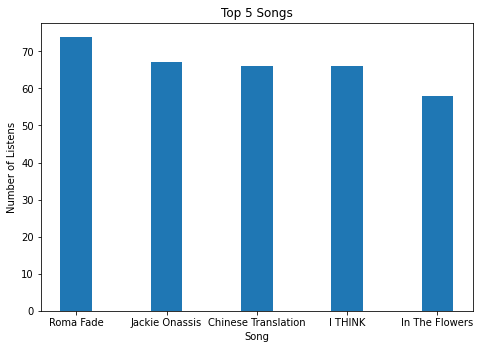

In [384]:

'''
artists = dict()
songs = dict()
days = dict()
'''

def topsongs():
    #print(songs)
    N = 5
    res = dict(sorted(songs.items(), key = itemgetter(1), reverse = True)[:N])
    #print(str(res))
    
    keys = list(res.keys())
    vals = list(res.values())
    width = 0.35
    #explode = (0, 0.1, 0, 0)
    #print(labels)
    #print(slices)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title('Top 5 Songs')
    ax.set_ylabel('Number of Listens')
    ax.set_xlabel('Song')
    ax.bar(keys, vals, width)
    plt.show()

    
#streaminghistory()
topsongs()

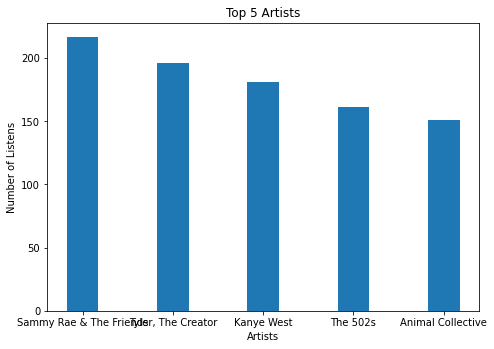

In [385]:

'''
artists = dict()
songs = dict()
days = dict()
'''

def topartists():
    #print(songs)
    N = 5
    res = dict(sorted(artists.items(), key = itemgetter(1), reverse = True)[:N])
    #print(str(res))
    
    keys = list(res.keys())
    vals = list(res.values())
    width = 0.35
    #explode = (0, 0.1, 0, 0)
    #print(labels)
    #print(slices)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title('Top 5 Artists')
    ax.set_ylabel('Number of Listens')
    ax.set_xlabel('Artists')
    ax.bar(keys, vals, width)
    plt.show()
    
#streaminghistory()
topartists()

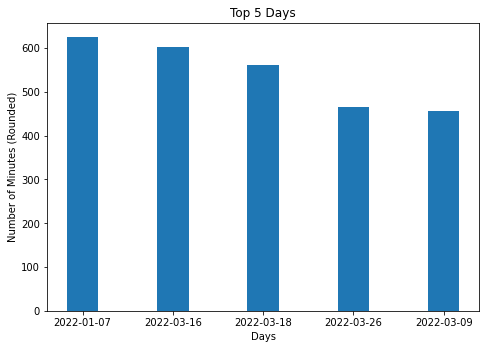

In [386]:

'''
artists = dict()
songs = dict()
days = dict()
'''

def topdays():
    #print(songs)
    N = 5
    res = dict(sorted(days.items(), key = itemgetter(1), reverse = True)[:N])
    #print(str(res))
    
    keys = list(res.keys())
    vals = list(res.values())
    width = 0.35
    #explode = (0, 0.1, 0, 0)
    #print(labels)
    #print(slices)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(keys, vals, width)
    ax.set_title('Top 5 Days')
    ax.set_ylabel('Number of Minutes (Rounded)')
    ax.set_xlabel('Days')
    plt.show()
    
#streaminghistory()
topdays()

general dashboard: 

general account information: 
	username: x5rqcqscv9d34yeeftb8dawz2
	country of user: US
	birthday: 06/06/2000
	gender: female
	date of account creation: 04/09/2021

user information: 
	display name: abby b!
	profile picture: refer to photo output

community engagement information: 
	number of followers: 23
	number of followings: 31

general library information (downloaded to devices): 
	number of songs: 585
	number of albums: 649
	number of shows: 10
	number of episodes: 12
	number of removed tracks: 0
	number of artists: 30
	number of removed artists: 0

data contained in the requested data download: 
	1: UserAddress.json
	2: Follow.json
	3: Inferences.json
	4: VoiceInput.json
	5: Userdata.json
	6: SearchQueries.json
	7: StreamingHistory0.json
	8: Identity.json
	9: YourLibrary.json
	10: Payments.json
	11: StreamingHistory1.json
	12: Read_Me_First.pdf
	13: Identifiers.json



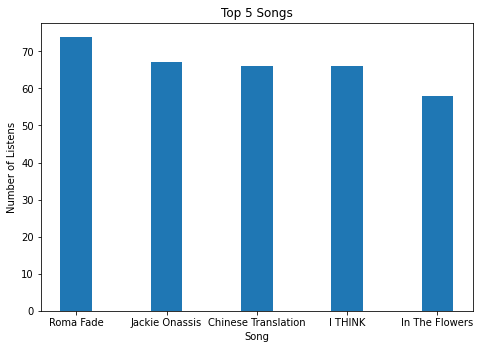

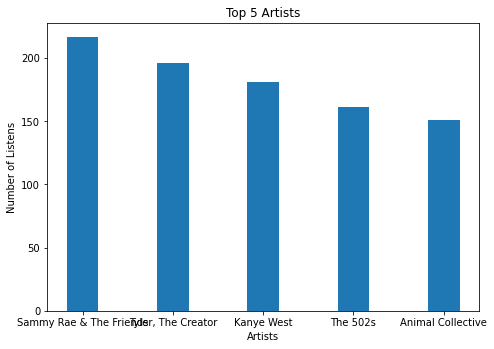

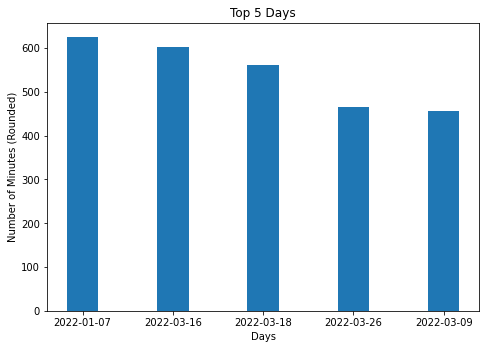

In [397]:
#Task 1.2 Final Dashboard
def general_dashboard():
    print("general dashboard: \n")
    print(userdata())
    print(identity())
    print(follow())
    print(library())
    print(files())
    topsongs()
    topartists()
    topdays()
    
general_dashboard()

In [398]:
#Task 1.3: Dashboard of Privacy Invasive information

In [399]:
#Task 1.3: Dashboard of Privacy Invasive information

In [400]:
#Identifiers.json
def identifiers():
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/Identifiers.json')
    json_data = f
    opened = json.loads(json_data.read())
    result = "account identifiable information: " + "\n"
    result += "\t" + "type of identifier: " + opened["identifierType"] + "\n"
    email = opened["identifierValue"]
    index = email.index("@")
    email_redacted = "*"
    email_redacted *= index
    email_redacted += email[index: len(email)]
    result += "\t" + "identifier: " + email_redacted + "\n"

    f.close()
    return result

print(identifiers())

account identifiable information: 
	type of identifier: email
	identifier: **********@gmail.com



In [401]:
#Identifiers.json
def identity_privacy():
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/Identity.json')
    json_data = f
    opened = json.loads(json_data.read())
    result = "user identifiable information: " + "\n"
    
    firstname_og = opened["firstName"]
    firstletter = opened["firstName"][0:1]
    firstname = "*"
    firstname *= len(firstname_og) - 1
    firstname = firstletter + firstname
    
    lastname_og = opened["lastName"]
    firstletter = opened["lastName"][0:1]
    lastname = "*"
    lastname *= len(lastname_og) - 1
    lastname = firstletter + lastname
    
    result += "\t" + "first name: " + firstname + "\n"
    result += "\t" + "last name: " + lastname + "\n"

    f.close()
    return result

print(identity_privacy())

user identifiable information: 
	first name: A******
	last name: B*****



In [402]:
#Payments.json
def payments():
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/Payments.json')
    json_data = f
    opened = json.loads(json_data.read())
    result = "payment information: " + "\n"
    
    card = opened['payment_method'].split(" ")
    card = card[1] + card[2] + card[3] + card[4]
    
    postalcode = opened['postal_code'].split("-")
    postalcode_redacted = ""
    
    
    for section in postalcode:
        #print(section)
        temp_pc = "*"
        temp_pc *= len(section)
        temp_pc = section[0:1] + temp_pc + "-"
        postalcode_redacted += temp_pc
        
    postalcode_redacted = postalcode_redacted[0: len(postalcode_redacted) - 2]
    
    result += "\t" + "card number: " + card + "\n"
    result += "\t" + "country: " + opened['country'] + "\n"
    result += "\t" + "postal code: " + postalcode_redacted + "\n"

    f.close()
    return result

print(payments())

payment information: 
	card number: (************1468)
	country: US
	postal code: 3*****-3***



In [446]:
#UserAddress.json
def useraddress():
    f = open("/Users/christopherbarnes/cmsc25910/Assignment3/MyData/UserAddress.json", "r")
    information = f.read()
    #print(information)
    
    
    information = information.replace("List", "")
    information = information.replace("Map", "")
    information = information.replace("City", "")
    information = information.replace("(", "")
    information = information.replace(")", "")
    information = information.replace("List", "")
    information = information.replace("city", "")
    information = information.replace("->", "")
    information = information.replace("postal_code_short", "")
    information = information.replace("state", "")
    information = information.replace("street", "")
    information = information.replace("   ", "")
    information = information.replace("  ", "")
    
    information = information.split(",")
    
    #print(information)
    
    cityred = "*"
    cityred *= len(information[0]) - 1
    cityred = information[0][0:1] + cityred
    
    
    streetred = ""
    splitted = information[1].split(" ")
    
    for word in splitted:
        temp_word = "*"
        temp_word *= len(word) - 1
        temp_word = word[0:1] + temp_word
        streetred += temp_word + " "
    
    streetred = streetred[0:len(streetred) - 1]
    
    postalcodered = "*"
    postalcodered *= len(information[2]) - 1
    postalcodered = information[2][0:1] + postalcodered
    
    statered = "*"
    statered *= len(information[3]) - 1
    statered = information[3][0:1] + statered
    
    result = "redacted user address: " + "\n"
    result += "\t" + "street: " + streetred + "\n"
    result += "\t" + "postal code: " + postalcodered + "\n"
    result += "\t" + "city: " + cityred + "\n"
    result += "\t" + "state: " + statered + "\n"

    f.close()
    return result

print(useraddress())

redacted user address: 
	street: 6*** R******** D**** N*
	postal code: 3****
	city: A******
	state: G*



In [404]:
#UserData.json
def userdata_privacy():
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/UserData.json')
    json_data = f
    opened = json.loads(json_data.read())
    
    
    fbuidred = "*" * len(opened['facebookUid'])
    
    pcred = str(opened['postalCode'])[0:1] + ("*" * len(str(opened['postalCode'])))
    
    mnred = ""
    splitted = opened['mobileNumber'].split("-")
    for section in splitted:
        temp = "*" * (len(section) - 1)
        temp = section[0:1] + temp + "-"
        mnred += temp
                                              
    mnred = mnred[0:len(mnred) - 2]
    
    mored = "*" * len(opened['mobileOperator'])
    
    mbred = "*" * len(opened['mobileBrand'])
    
    result = "redacted user data: " + "\n"
    result += "\t" + "facebook user id: " + fbuidred + "\n"
    result += "\t" + "postal code: " + pcred + "\n"
    result += "\t" + "mobile number: " + mnred + "\n"
    result += "\t" + "mobile operator: " + mored + "\n"
    result += "\t" + "mobile brand: " + mbred + "\n"

    f.close()
    return result

print(userdata_privacy())

redacted user data: 
	facebook user id: ***************
	postal code: 3*****
	mobile number: 6**-7**-5**
	mobile operator: ****
	mobile brand: *****



In [405]:
#VoiceInput.json
def voiceinput_privacy():
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/VoiceInput.json')
    json_data = f
    opened = json.loads(json_data.read())
    
    listofred = []
    for element in opened:        
        splitted = element['voiceSearchQuery'].split(" ")
        vsqred = ""
        for word in splitted:
            temp = "*" * (len(word) - 1)
            temp = word[0:1] + temp
            vsqred += temp + " "
        vsqred = vsqred[0: len(vsqred) - 1]
        listofred.append(vsqred)
    
    
    #print(listofred)
    result = "redacted voice search queries: " + "\n"
    i = 1
    for query in listofred:
        result += "\t" + str(i) + ": " + query + "\n"
        i += 1

    f.close()
    return result

print(voiceinput_privacy())

redacted voice search queries: 
	1: p*** J***** O******
	2: p*** M* G****
	3: s*** p****** m****



In [406]:
#Task 1.3 Final Privacy Dashboard
def privacy_dashboard():
    print("privacy dashboard: \n")
    print(identifiers())
    print(identity_privacy())
    print(payments())
    print(useraddress())
    print(userdata_privacy())
    print(voiceinput_privacy())
    
privacy_dashboard()

privacy dashboard: 

account identifiable information: 
	type of identifier: email
	identifier: **********@gmail.com

user identifiable information: 
	first name: A******
	last name: B*****

payment information: 
	card number: (************1468)
	country: US
	postal code: 3*****-3***

redacted user address: 
	street: 6*** R******** D**** N*
	postal code: 3****
	city: A******
	state: G*

redacted user data: 
	facebook user id: ***************
	postal code: 3*****
	mobile number: 6**-7**-5**
	mobile operator: ****
	mobile brand: *****

redacted voice search queries: 
	1: p*** J***** O******
	2: p*** M* G****
	3: s*** p****** m****



In [407]:
#Task 1.4: the fun stuff!

In [408]:
#most common words in inference

import re

infer = dict()

def inference():
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/Inferences.json')
    json_data = f
    opened = json.loads(json_data.read())

    #print(opened['inferences'])
    
    inferlist = opened['inferences']
    
    i = 0
    
    while i < len(inferlist):
        splitted = re.split(' |_', inferlist[i])
        #print(splitted)
        
        for word in splitted:
            if word in infer:
                temp_infer = infer[word]
                infer[word] = temp_infer + 1
            else:
                infer[word] = 1
        i = i + 1    
        
    infer.pop('')
    infer.pop('and')
    infer.pop('In')
    f.close()
    
inference()
print(infer)

{'1P': 3, 'Custom': 48, 'Discovery': 1, 'Streamers': 1, 'T-Mobile': 1, 'Switchers': 2, 'United': 1, 'States': 1, '2P': 4, 'Kohl’s': 1, 'Deep': 1, 'Discount': 1, '19Jan2021': 1, 'US': 100, 'Microsoft': 1, 'Tech': 2, 'Savvy/Deal': 1, 'Seeking': 1, 'Fams': 1, '14Oct2020': 1, 'Reckitt': 1, 'Benckiser': 1, 'ODC': 7, 'RB': 1, 'Air': 3, 'Wick': 2, 'Care': 1, 'Category': 5, 'Buyers': 10, 'ANDNOT': 1, '202105': 1, '23Jun2021': 1, 'Toyota': 3, 'Upbeat': 1, 'Boomers': 1, '202009': 1, '30Sept2020': 1, '3P': 93, 'College': 2, 'Basketball': 2, 'Fans': 2, '[Do': 4, 'Not': 4, 'Use': 4, 'in': 4, '2021]': 4, 'Runners': 1, 'Running': 1, '18February2021': 1, '20Jan2021': 1, 'Industry': 2, 'Vonage': 1, '23March2020': 1, 'Lexus': 1, 'In-Market': 1, 'Aspirational': 1, 'Shoppers': 2, '2019': 2, 'FamilyMemberAge65Plus': 1, '22Dec2020': 1, 'Owned/Leased': 1, 'Car': 4, '+4': 1, 'Years': 1, 'Old': 1, '08March2021': 1, 'Samsung': 1, 'Creative': 1, 'Freelancers': 1, '12August2020': 1, 'Buick': 1, 'Owners': 9, 'Chry

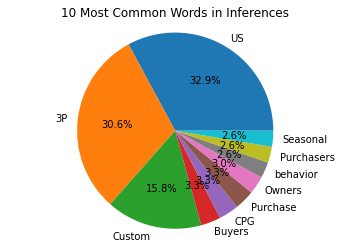

In [409]:
def topinferences():
    N = 10
    res = dict(sorted(infer.items(), key = itemgetter(1), reverse = True)[:N])
    keys = list(res.keys())
    vals = list(res.values())
    #print(keys)
    #print(vals)
    
    fig1, ax1 = plt.subplots()
    ax1.pie(vals, labels=keys, autopct='%1.1f%%')
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title("10 Most Common Words in Inferences")
    plt.show()

    
#streaminghistory()
topinferences()

In [410]:
#most commonly searched words

wordsearch = dict()

def searchedwords():
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/SearchQueries.json')
    json_data = f
    opened = json.loads(json_data.read())
    
    #for searches in opened:
        #print(searches['searchQuery'])
        
    i = 0
    
    while i < len(opened):
        word = opened[i]['searchQuery']
        if word in wordsearch:
            temp_word = wordsearch[word]
            wordsearch[word] = temp_word + 1
        else:
            wordsearch[word] = 1
        i = i + 1    
        
    f.close()

searchedwords()
#print(wordsearch)

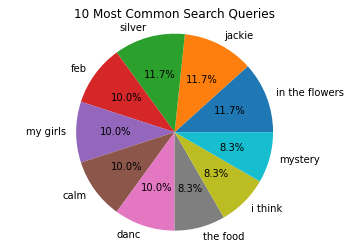

In [411]:
def topsearchedwords():
    N = 10
    res = dict(sorted(wordsearch.items(), key = itemgetter(1), reverse = True)[:N])
    keys = list(res.keys())
    vals = list(res.values())
    #print(keys)
    #print(vals)
    
    fig1, ax1 = plt.subplots()
    ax1.pie(vals, labels=keys, autopct='%1.1f%%')
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title("10 Most Common Search Queries")
    plt.show()

topsearchedwords()

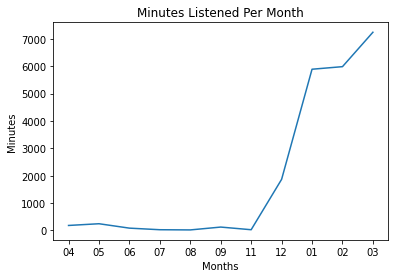

In [412]:
#minutes per day graphed
import matplotlib.pyplot as plt

def minutespermonth():
    mons = months.keys()
    mins = months.values()
    plt.plot(mons, mins)
    plt.title('Minutes Listened Per Month')
    plt.xlabel('Months')
    plt.ylabel('Minutes')
    plt.show()
    
minutespermonth()

Dashboard of Visualized Data:


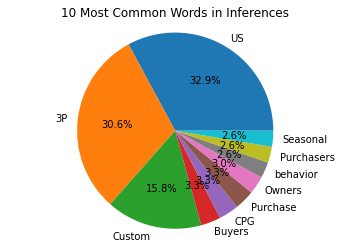

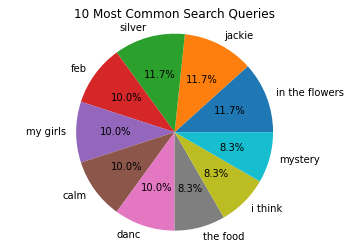

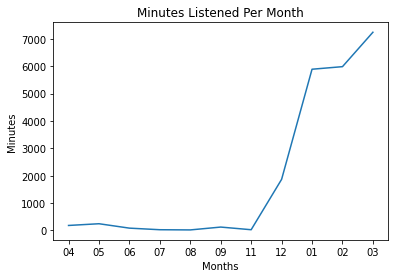

In [416]:
def nonpriv_dashboard():
    print("Dashboard of Visualized Data:")
    topinferences()
    topsearchedwords()
    minutespermonth()
    
nonpriv_dashboard()

In [420]:
#Task 1.5: Fun privacy visual
priv = dict()

In [425]:
#personal information privacy
def identifier_priv():
    #Identifiers
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/Identifiers.json')
    json_data = f
    opened = json.loads(json_data.read())
    
    counter = 0
    counter += len(opened)
    
    f.close()
    
    #Identity
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/Identity.json')
    json_data = f
    opened = json.loads(json_data.read())
    counter += len(opened)
    
    f.close
    
    #UserData
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/Userdata.json')
    json_data = f
    opened = json.loads(json_data.read())
    counter += len(opened)
    
    f.close()
    
    priv['personal_information'] = counter

identifier_priv()

In [438]:
#inferences privacy
def inferences_priv():
    #Inferences
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/Inferences.json')
    json_data = f
    opened = json.loads(json_data.read())
    
    counter = 0
    counter += len(opened['inferences'])
    

    f.close
    
    priv['inferences'] = counter

inferences_priv()

In [439]:
#payment privacy
def payment_priv():
    #payment
    f = open('/Users/christopherbarnes/cmsc25910/Assignment3/MyData/Payments.json')
    json_data = f
    opened = json.loads(json_data.read())
    #opened = list(f)
    
    counter = 0
    counter += len(opened)
    
    f.close
    
    priv['payments'] = counter

In [451]:
#location privacy
def location_priv():
    #Location
    f = open("/Users/christopherbarnes/cmsc25910/Assignment3/MyData/UserAddress.json", "r")
    information = f.read()
    #print(information)
    
    
    information = information.replace("List", "")
    information = information.replace("Map", "")
    information = information.replace("City", "")
    information = information.replace("(", "")
    information = information.replace(")", "")
    information = information.replace("List", "")
    information = information.replace("city", "")
    information = information.replace("->", "")
    information = information.replace("postal_code_short", "")
    information = information.replace("state", "")
    information = information.replace("street", "")
    information = information.replace("   ", "")
    information = information.replace("  ", "")
    
    information = information.split(",")
    #print(information)
    counter = 0
    counter += len(information)
    
    f.close()
    priv['location'] = counter
    

location_priv()

In [452]:
#adding all values to priv dict
def instantiate_priv():
    identifier_priv()
    inferences_priv()
    payment_priv()
    location_priv()

instantiate_priv()
print(priv)

{'identifiers': 2, 'personal_information': 21, 'inferences': 117, 'payments': 4, 'location': 4}


In [455]:
#visually representing the privacy invasive information
def show():
    
    print("All PII: \n")
    
    keys = priv.keys()
    
    for key in keys:
        index = priv[key]
        i = 0
        while i < index:
            print(key)
            i += 1
show()

All PII: 

identifiers
identifiers
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
personal_information
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferences
inferen